In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
#D:\VariablesWeightPipik-main
filename_ = "Peningk Produktivitas, Efisiens.xlsx"
path_computer = "C:/Users/pc/Documents/pythonProjects/VariablesWeightPipik-main/"
path_laptop = "D:/VariablesWeightPipik-main/"
dataframe = pd.read_excel(path_laptop + filename_)
# dependent = pd.read_excel(r"D:/pythonprojects/VariablesWeightPipik/dependent.xlsx")
# independent = pd.read_excel(r"D:/pythonprojects/VariablesWeightPipik/independent.xlsx")

# dataframe = dataframe.drop('Unnamed: 7',axis = 1)
# dataframe = dataframe.drop('Unnamed: 8',axis = 1)
print(dataframe.isna().sum()) #50
dataframe = dataframe.dropna()
#dataframe.fillna(dataframe.mean(numeric_only=True),inplace=True)

print(len(dataframe))
print(dataframe.isna().sum())
dataframe.head(5)

No                                                 0
Provinsi                                           0
Kota/Kabupaten                                     0
Selisih Produktivitas Sktor Perkotaan (Rp/Ha)     28
Efisiensi Penduduk (Penamb 1 Ha>Penamb Jiwa)      31
Efsiensi Ekonomi (Penambahan 1 Ha>Penamb Juta)    14
dtype: int64
478
No                                                0
Provinsi                                          0
Kota/Kabupaten                                    0
Selisih Produktivitas Sktor Perkotaan (Rp/Ha)     0
Efisiensi Penduduk (Penamb 1 Ha>Penamb Jiwa)      0
Efsiensi Ekonomi (Penambahan 1 Ha>Penamb Juta)    0
dtype: int64


,No,Provinsi,Kota/Kabupaten,Selisih Produktivitas Sktor Perkotaan (Rp/Ha),Efisiensi Penduduk (Penamb 1 Ha>Penamb Jiwa),Efsiensi Ekonomi (Penambahan 1 Ha>Penamb Juta)
0,1,PROVINSI JAWA TENGAH,Cilacap,-4257.069468,12.485908,770.078362
1,2,PROVINSI JAWA TENGAH,Banyumas,-477.928505,13.871314,932.804393
2,3,PROVINSI JAWA TENGAH,Purbalingga,-1011.715732,15.441474,765.204199
3,4,PROVINSI JAWA TENGAH,Banjarnegara,-678.773717,21.380952,983.936787
4,5,PROVINSI JAWA TENGAH,Kebumen,-637.343199,9.524475,483.695898


In [85]:
start_indexing_dependent_var = 3#:(y) banyak independent variabel 
start_indexing_independent_var = 4 #(x)

nama_x =  dataframe.columns[start_indexing_independent_var]
nama_y = dataframe.columns[start_indexing_dependent_var]

n_row = len(dataframe)  #banyak per kolom (banyak baris)

x  = dataframe.iloc[:,start_indexing_dependent_var]
y  = dataframe.iloc[:,start_indexing_independent_var]


In [86]:
from sklearn.preprocessing import StandardScaler
import numpy as np
x_standarscaler = np.array(x)
x_standarscaler = x_standarscaler.reshape(-1,1)
x_standarscaler = StandardScaler().fit(x_standarscaler).transform(x_standarscaler.astype(float))
x_standarscaler.max()

3.206626919836656

In [87]:
y_standarscaler = np.array(y)
y_standarscaler = y_standarscaler.reshape(-1,1)
y_standarscaler = StandardScaler().fit(y_standarscaler).transform(y_standarscaler.astype(float))
y_standarscaler.max()

11.584180289739209

In [88]:
x_data = []
y_data = []
for i in range(len(x)):
    x_data.append(x_standarscaler[i][0])
    y_data.append(y_standarscaler[i][0])
print(x_data[:5])
y_data[:5]


[-0.0529025253378046, 0.17164255555522967, 0.1399265393428031, 0.1597089429147864, 0.16217061853453907]


[-0.42691029433371946,
 -0.4196964969907815,
 -0.41152068636275946,
 -0.38059387172941256,
 -0.44233045207988014]

In [89]:

df = pd.DataFrame({"X":x, "Y" : y})
print(df["X"].max())
print(df["Y"].max())

3.206626919836656
11.584180289739209


In [90]:
df["rank_x"] = df["X"].rank()
# print(df["rank_x"].min())
# print(df["rank_x"].max())
df["rank_y"] = df["Y"].rank()

df.head(5)
df = df.sort_values(by="rank_x")
df

,X,Y,rank_x,rank_y
314,-14.110847,-0.240959,1.0,234.0
385,-9.738216,-0.364784,2.0,117.0
349,-6.010517,-0.417802,3.0,55.0
139,-5.261172,1.715215,4.0,466.0
154,-4.900297,0.261754,5.0,411.0
...,...,...,...,...
111,0.838231,0.896489,474.0,453.0
357,0.950221,3.696580,475.0,473.0
110,0.975787,1.096896,476.0,460.0
108,1.101735,8.528778,477.0,477.0


In [91]:
n = len(df)

sum_term  =df['rank_y'].diff().abs().sum()

coefficient = (1 - 3* sum_term/ (pow(n,2) - 1)) 
print("Sum term :" + str(sum_term))
print(coefficient)

Sum term :58705.0
0.2291986712359344


In [94]:
line_x = [x_standarscaler.min(),x_standarscaler.max()]
line_y = [(coefficient * line_x[0]),(coefficient * line_x[1])]

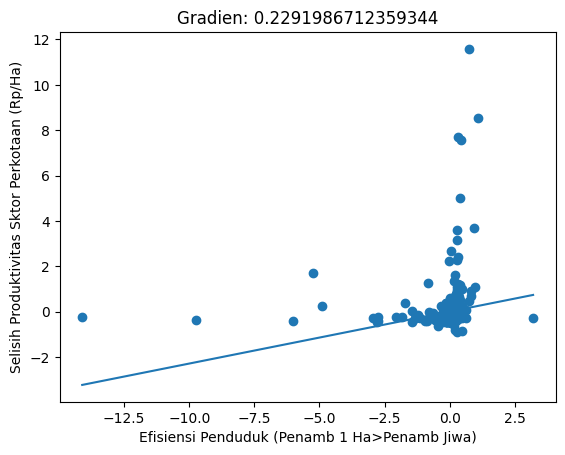

In [95]:
plt.scatter(x=x_data,y=y_data)
plt.plot(line_x,line_y)
plt.xlabel(nama_x)
plt.ylabel(nama_y)
plt.title("Gradien: " + str(coefficient))
plt.show()

In [96]:
line_xx = [x.min(),x.max()]
line_yy = [(coefficient * line_x[0]),(coefficient * line_x[1])]

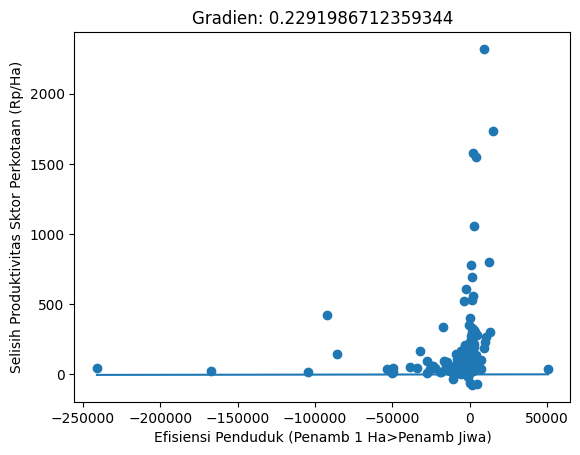

In [98]:
plt.scatter(x=x,y=y)
plt.plot(line_xx,line_yy)
plt.xlabel(nama_x)
plt.ylabel(nama_y)
plt.title("Gradien: " + str(coefficient))
plt.show()